# Trie and Suffix Tree data structures


In [1]:
from graphviz import Source
import time

## Trie node and Trie

In [2]:
class TrieNode:
    counter = 1
    
    def __init__(self,letter = '', parent = None, depth = 0):
        self.letter = letter
        self.parent = parent
        self.depth = depth
        self.children = {}
        self.id = TrieNode.counter
        self.label = letter
        TrieNode.counter += 1
    
    # this function allows us to graft either by passing a whole string to the root or end of a suffix to the head
    def graft(self, string):
        node = self
        for letter in string:
            if not letter in node.children.keys():
                node.children[letter] = TrieNode(letter,node,node.depth+1)
            node = node.children[letter]
        return node
    
    
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
    
    def dot_edges(self):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        return "\n".join(result)
    
    def get_all_children(self):
        result = [self]
        for child in self.children.values():
            result += child.get_all_children()
        return result 
    
    def show_tree(self):
        nodes = self.get_all_children()
        TrieNode.show_graph(nodes)
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}

        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        s = Source(result)
        display(s)   

In [3]:
class Trie:
    def __init__(self,text):
        self.root = TrieNode()
        self.leafs = []
        self.leafs.append(self.root.graft(text))
        leaf = self.leafs[0]
        for i in range(1,len(text)):
            suffix = text[i:]
            head = self.find(suffix,leaf)
            suffix_end = suffix[head.depth:]
            leaf = head.graft(suffix_end)
        
        
    def find(self,suffix,leaf):
        node = self.root
        i = 0
        while suffix[i] in node.children.values():
            node = node.children
            i+=1
        return node
    
    def show_trie(self):
        self.root.show_tree()  

## Suffix tree node and Suffix Tree

In [4]:
class SuffixNode: # cały tekst ma start w 0 a end w n więc jego range to jest start,end (0,n) - end indeksuję zwiększone o jeden
    counter = 1
    
    def __init__(self,text,start=0,end=0,depth=0,parent=None):
        self.text = text
        self.start = start
        self.end = end
        self.parent = parent
        self.depth = depth
        self.children = {}
        self.id = SuffixNode.counter
        SuffixNode.counter += 1
    
    #adding a piece of a text to a node - creating a new edge in a tree
    def graft(self,newStart):
        newEnd = len(self.text)
        newDepth = self.depth + (newEnd - newStart)
        child = SuffixNode(self.text,newStart,newEnd,newDepth,self)
        self.children[self.text[newStart]] = child
    
    def break_path(self,string):
        length = len(string)
        child = self.children[string[0]]
        newNode = SuffixNode(self.text,child.start,child.start+length,self.depth + length, self)
        child.start = child.start + length
        child.parent = newNode
        newNode.children[self.text[child.start]] = child
        self.children.pop(string[0])
        self.children[string[0]] = newNode
        
        return newNode
    
    def slow_find(self,string):
        if len(string) == 0 or string[0] not in self.children.keys():
            return self
        child = self.children[string[0]]
        for i in range(1, child.end-child.start):
            if self.text[child.start+i] != string[i]:
                return self.break_path(string[:i])
        return child.slow_find(string[child.end-child.start:]) 
    
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
    
    def dot_edges(self):
        result = []
        for child in self.children.values():
            if child.start+1 == child.end:
                newLabel = child.text[child.start]
            else:
                newLabel = f'[{child.start}/{child.end}]'
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {newLabel}"];')
        return "\n".join(result)
    
    def get_all_children(self):
        result = [self]
        for child in self.children.values():
            result += child.get_all_children()
        return result 
    
    def show_tree(self):
        nodes = self.get_all_children()
        SuffixNode.show_graph(nodes)
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        s = Source(result)
        display(s)


class SuffixTree:
    def __init__(self,text):
        self.root = SuffixNode(text)
        self.leafs=[]
        self.leafs.append(self.root.graft(0))
        leaf = self.leafs[0]
        for i in range(1, len(text)):
            head = self.root.slow_find(text[i:])
            head.graft(i+head.depth)

                
    def show_stree(self):
        self.root.show_tree()

In [5]:
class SuffixTree:
    def __init__(self,text):
        self.root = SuffixNode(text)
        self.leafs=[]
        self.leafs.append(self.root.graft(0))
        leaf = self.leafs[0]
        for i in range(1, len(text)):
            head = self.root.slow_find(text[i:])
            head.graft(i+head.depth)

                
    def show_stree(self):
        self.root.show_tree()

# Tests and visualisation 

Suffix tree building time: 7.12e-05 s
Trie building time:        6.21e-05 s


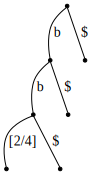

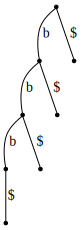

In [6]:
text = "bbb$"
time1 = time.perf_counter()
newSTree = SuffixTree(text)
time2 = time.perf_counter()
newTrie = Trie(text)
time3=time.perf_counter()
print("Suffix tree building time:",f"{time2-time1:.6}","s")
print("Trie building time:       ",f"{time3-time2:.6}","s")
newSTree.show_stree()
newTrie.show_trie()

Suffix tree building time: 8.25e-05 s
Trie building time:        8.55e-05 s


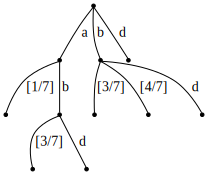

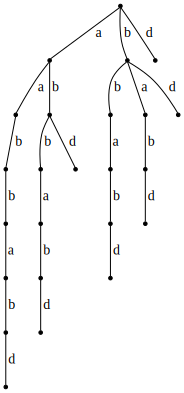

In [7]:
text = "aabbabd"
time1 = time.perf_counter()
newSTree = SuffixTree(text)
time2 = time.perf_counter()
newTrie = Trie(text)
time3=time.perf_counter()
print("Suffix tree building time:",f"{time2-time1:.6}","s")
print("Trie building time:       ",f"{time3-time2:.6}","s")
newSTree.show_stree()
newTrie.show_trie()

Suffix tree building time: 0.0001442 s
Trie building time:        0.0001478 s


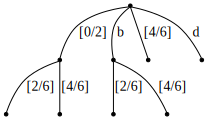

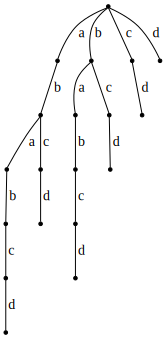

In [8]:
text = "ababcd"
time1 = time.perf_counter()
newSTree = SuffixTree(text)
time2 = time.perf_counter()
newTrie = Trie(text)
time3=time.perf_counter()
print("Suffix tree building time:",f"{time2-time1:.6}","s")
print("Trie building time:       ",f"{time3-time2:.6}","s")
newSTree.show_stree()
newTrie.show_trie()

Suffix tree building time: 0.000112 s
Trie building time:        9.27e-05 s


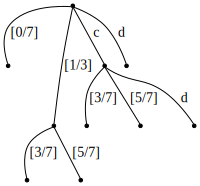

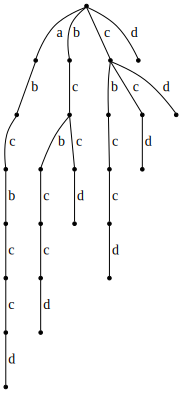

In [9]:
text = "abcbccd"
time1 = time.perf_counter()
newSTree = SuffixTree(text)
time2 = time.perf_counter()
newTrie = Trie(text)
time3=time.perf_counter()
print("Suffix tree building time:",f"{time2-time1:.6}","s")
print("Trie building time:       ",f"{time3-time2:.6}","s")
newSTree.show_stree()
newTrie.show_trie()

In [10]:
file = open('1997_714_head.txt', 'r')
text = file.read()
text += '\0'
time1 = time.perf_counter()
newTrie = Trie(text)
time2 = time.perf_counter()
newSTree = SuffixTree(text)
time3=time.perf_counter()
print("Trie building time:       ",f"{time2-time1:.6}","s")
print("Suffix tree building time:",f"{time3-time2:.6}","s")

Trie building time:        9.06552 s
Suffix tree building time: 0.0336044 s
